In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime
import time

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
coordinates = list(lat_lngs)

In [15]:
city_names = []
country_names = []

for x in coordinates:
    this_city = citipy.nearest_city(x[0], x[1]).city_name
    this_country = citipy.nearest_city(x[0], x[1]).country_code
    if this_city not in city_names:
        city_names.append(this_city)
        country_names.append(this_country)
len(city_names)

615

In [16]:
url = f'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}'



In [17]:
# empty list to hold weather data
city_data = []

#print log beginning
print("Beginning Data Retrieval   ")
print("---------------------------")

#create counters
record_count = 1
set_count = 1

# loop through all cities
for i, city in enumerate(city_names):
    
    # group cities in sets of 50 for logging and rest for one minute to comply with api rules
    if( i % 50 == 0 and i>=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # create url for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log url, record, and set numbers, and city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #increase record
    record_count += 1
    
    try:
        #parse the json
        city_weather = requests.get(city_url).json()

        #grab the data
        country = (city_weather['sys']['country'])
        lat = (city_weather['coord']['lat'])
        lng = (city_weather['coord']['lon'])
        max_temp = (city_weather['main']['temp_max'])
        min_temp = (city_weather['main']['temp_min'])
        humidity = (city_weather['main']['humidity'])
        clouds = (city_weather['clouds']['all'])
        wind = (city_weather['wind']['speed'])

        #convert date to iso
        date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%y-%m-%d %H:%M:%S')

        #add data to city_data list
        city_data.append({'City': city.title(),
                           'Country': country,
                           "Date": date,
                           "Lat": lat,
                           "Lng": lng,
                           "Max Temp": max_temp,
                           "Min Temp": min_temp,
                           "Humidity": humidity,
                           "Cloudiness": clouds,
                           "Wind Speed": wind,})
# error handling, skip city
    except:
        print(f"City not found. Skipping...")
        pass

#data loading complete message
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")
        

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | cap malheureux
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | letpadan
Processing Record 9 of Set 1 | mezen
Processing Record 10 of Set 1 | bougouni
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | bairiki
Processing Record 13 of Set 1 | soe
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | santa isabel do rio negro
Processing Record 17 of Set 1 | thinadhoo
Processing Record 18 of Set 1 | beringovskiy
Processing Record 19 of Set 1 | prince rupert
Processing Record 20 of Set 1 | rantauprapat
Processing Record 21 of Set 1 | bowen
Processing Re

Processing Record 33 of Set 4 | ayan
Processing Record 34 of Set 4 | antalaha
Processing Record 35 of Set 4 | kaitangata
Processing Record 36 of Set 4 | cradock
Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | souillac
Processing Record 39 of Set 4 | burica
City not found. Skipping...
Processing Record 40 of Set 4 | waitati
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | myaundzha
Processing Record 45 of Set 4 | inhambane
Processing Record 46 of Set 4 | yenagoa
Processing Record 47 of Set 4 | hermanus
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | teguise
Processing Record 50 of Set 4 | lawrenceburg
Processing Record 1 of Set 5 | esqueda
Processing Record 2 of Set 5 | klang
Processing Record 3 of Set 5 | wanning
Processing Record 4 of Set 5 | saint-augustin
Processing Record 5 of Set 5 | coahuayana
Process

Processing Record 26 of Set 8 | hofn
Processing Record 27 of Set 8 | palana
Processing Record 28 of Set 8 | stoyba
City not found. Skipping...
Processing Record 29 of Set 8 | zhicheng
Processing Record 30 of Set 8 | azanka
Processing Record 31 of Set 8 | laerdalsoyri
Processing Record 32 of Set 8 | berezovyy
Processing Record 33 of Set 8 | ugoofaaru
Processing Record 34 of Set 8 | kulob
Processing Record 35 of Set 8 | akdepe
Processing Record 36 of Set 8 | ternate
Processing Record 37 of Set 8 | doka
Processing Record 38 of Set 8 | sangar
Processing Record 39 of Set 8 | kazachinskoye
Processing Record 40 of Set 8 | marienburg
Processing Record 41 of Set 8 | puerto madryn
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | jiuquan
Processing Record 44 of Set 8 | pisco
Processing Record 45 of Set 8 | jiexiu
Processing Record 46 of Set 8 | pasni
Processing Record 47 of Set 8 | ust-tsilma
Processing Record 48 of Set 8 | stykkisholmur
Processing Record 49 of Set 8 | c

Processing Record 14 of Set 12 | kita
Processing Record 15 of Set 12 | paraiba do sul
Processing Record 16 of Set 12 | monrovia
Processing Record 17 of Set 12 | pohorelice
Processing Record 18 of Set 12 | fort nelson
Processing Record 19 of Set 12 | verkhoyansk
Processing Record 20 of Set 12 | vila franca do campo
Processing Record 21 of Set 12 | brae
Processing Record 22 of Set 12 | canazas
Processing Record 23 of Set 12 | tadine
Processing Record 24 of Set 12 | xinzhou
Processing Record 25 of Set 12 | gorno-chuyskiy
City not found. Skipping...
Processing Record 26 of Set 12 | bacuit
City not found. Skipping...
Processing Record 27 of Set 12 | sakakah
Processing Record 28 of Set 12 | goderich
Processing Record 29 of Set 12 | kandrian
Processing Record 30 of Set 12 | juneau
Processing Record 31 of Set 12 | egersund
Processing Record 32 of Set 12 | emerald
Processing Record 33 of Set 12 | kizner
Processing Record 34 of Set 12 | fairlie
Processing Record 35 of Set 12 | kysyl-syr
Processi

In [18]:
len(city_data)

563

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Min Temp,Humidity,Cloudiness,Wind Speed
0,Cap Malheureux,MU,22-04-26 03:55:44,-19.9842,57.6142,75.47,75.47,78,21,3.00
1,Ribeira Grande,PT,22-04-26 03:55:45,38.5167,-28.7000,59.18,59.18,71,68,9.37
2,Ushuaia,AR,22-04-26 03:55:11,-54.8000,-68.3000,40.66,40.66,70,40,17.27
3,Talnakh,RU,22-04-26 03:55:46,69.4865,88.3972,9.21,9.21,91,100,7.58
4,Mar Del Plata,AR,22-04-26 03:55:47,-38.0023,-57.5575,60.87,46.42,81,6,8.01
5,Busselton,AU,22-04-26 03:53:14,-33.6500,115.3333,68.02,68.02,51,45,15.57
6,Letpadan,MM,22-04-26 03:55:47,17.7833,95.7500,97.41,97.41,38,8,6.89
7,Mezen,RU,22-04-26 03:55:48,65.8522,44.2400,33.64,33.64,99,100,5.01
8,Bougouni,ML,22-04-26 03:55:48,11.4170,-7.4790,80.78,80.78,19,76,3.71
9,Punta Arenas,CL,22-04-26 03:53:15,-53.1500,-70.9167,37.51,37.11,65,0,10.36


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

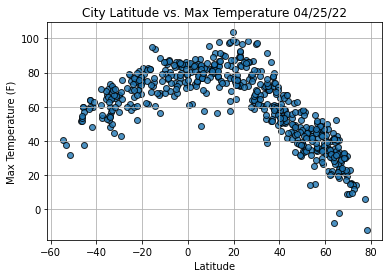

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

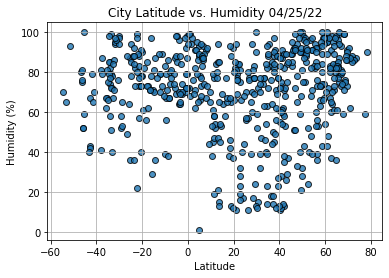

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

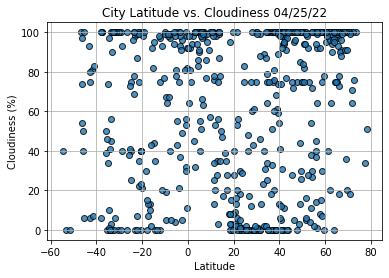

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

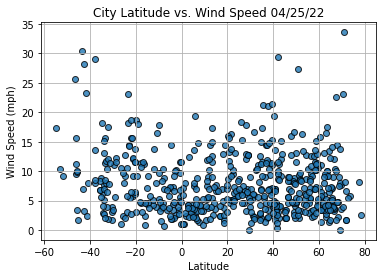

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()